In [ ]:
""" This module quantifies the reduced number and frequency of days below freezing """

In [1]:
from class_ai import Temperature_Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### Set up my Class
data = pd.read_excel("cleandata.xlsx", sheet_name=None)
tp = Temperature_Data(data)
years = tp.years
years = years[::-1]

In [3]:
number_of_high_freeze = []
for year in years:
    count = 0
    highs = tp.collect_month(1,year,0)
    for temp in highs:
        if temp < 32.0:
            count+=1
    number_of_high_freeze.append(count)
number_of_high_freeze = np.array(number_of_high_freeze)
print("Completed.")

Completed.


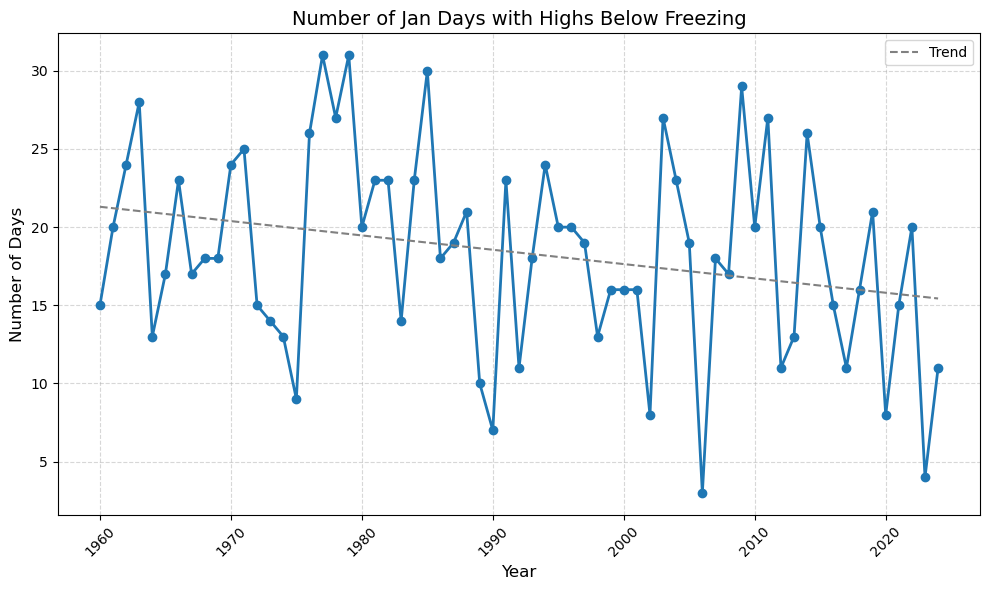

In [4]:
# Convert years to integers
x = np.array(years).astype(int)

# Create the plot
plt.figure(figsize=(10, 6))  # Larger size for better readability
plt.plot(x, number_of_high_freeze, marker='o', linewidth=2)

# Titles and labels
plt.title("Number of Jan Days with Highs Below Freezing", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Days", fontsize=12)

# Improve x-axis ticks
plt.xticks(rotation=45)  # Rotate for better spacing
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid for clarity

# Optional: add a trend line
z = np.polyfit(x, number_of_high_freeze, 1)
p = np.poly1d(z)
plt.plot(x, p(x), linestyle='--', color='gray', label='Trend')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [11]:
days_lost_per_decade = z[0]*10
print("Per Decade:",days_lost_per_decade,"Since 1960:",days_lost_per_decade*6.5)

Per Decade: -0.9169580419580368 Since 1960: -5.960227272727239
